Krista Miller
Assignment 6 

Goal: The goal of this assignment is to give you the opportunity to implement the Gradient Algorithm from scratch as well as using tools into sklearn.  You will also run regression analysis, evaluate, test assumptions and provde interpretations using your own data. 

In [14]:
import pandas as pd
import numpy as np
from patsy import dmatrix
from numpy.linalg import inv
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Question 1:

Use the entire health data provided on canvas for this question.  Here are the first few rows of the data. 

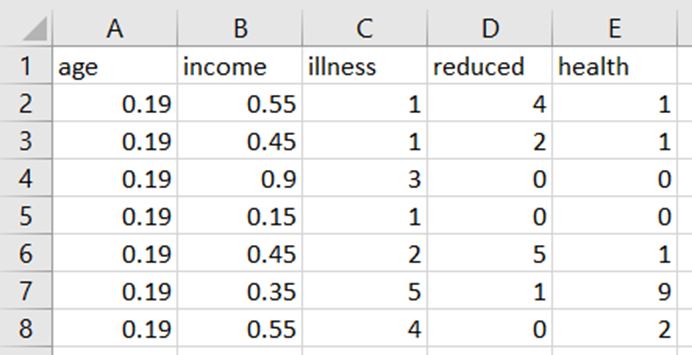

The variables are described as follows. 

age  =  Age in years divided by 100.
income = Annual income in tens of thousands of dollars.
illness = Number of illnesses in past 2 weeks.
reduced = Number of days of reduced activity in past 2 weeks due to illness or injury.
health = General health questionnaire score using Goldberg's method. Note that higher health scores indicate worse health condition. 

Use the age, income, illness and reduced variables as input variables and use the health variable as an output variable. You will find the parameters or coefficients (intercept and slopes) of a regression equation that models the relationship between the input and output variables. First use the StandardScaler() in sklearn to standardize the input data before you run your algorithm or fit your model. 

1 a) Implement batch gradient descent from scratch to find the regression parameters as in the pseudo code below:

b_0 = 0
b_1 = 0
Initialize all the b’s up to b_k, where k = number of features
α = 0.01
iterations = 10000
x_1 = np.array(x1_values) # a vector 
Initialize all the x’s up to x_k
x_k= np.array(x2_values) # a vector 
y = np.array(y_values) # a vector 
For i in range(iterations):
	predicted_y = b_0 + b_1*x_1+ b_2 〖*x〗_2 # a vector	
	errors = y – predicted_y # a vector 
	b_0=b_0+α*  1/n*sum(errors) 
	b_j=b_j+α*  1/n*sum(error*x_j) # for all the j=1,…,k
print(b_0,…,b_k)# in this case, k=2

In [15]:
data = pd.read_csv("Health_Data.csv")
data.head()
data.shape

(5190, 5)

In [16]:
health = pd.read_csv('Health_Data.csv')
health.head()

X = health[['age', 'income', 'illness', 'reduced']]
y = health['health']

ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

X_scaled.head()

,age,income,illness,reduced
0,-1.056765,-0.089896,-0.312123,1.086862
1,-1.056765,-0.360993,-0.312123,0.394185
2,-1.056765,0.858945,1.132944,-0.298492
3,-1.056765,-1.174285,-0.312123,-0.298492
4,-1.056765,-0.360993,0.410410,1.433200


In [17]:
b_0 = 0
b_1 = 0
b_2 = 0
b_3 = 0
b_4 = 0

a = 0.01
iterations = 10000
x_1 = np.array(X.age) # a vector 
x_2= np.array(X.income) # a vector 
x_3 = np.array(X.illness) # a vector 
x_4 = np.array(X.reduced) # a vector 
y = np.array(y) 

for i in range(iterations):
    predicted_y = b_0 + b_1*x_1+ b_2*x_2 + b_3*x_3 + b_4*x_4
    errors = y-predicted_y # a vector 
    n= len(y-errors)
    b_0=b_0+ a*1/n*sum(errors) 
    b_1=b_1+a*1/n*sum(errors * x_1) 
    b_2=b_2+a*1/n*sum(errors * x_2) 
    b_3=b_3+a*1/n*sum(errors * x_3) 
    b_4=b_4+a*1/n*sum(errors * x_4) 
    
print(b_0,b_1,b_2,b_3,b_4)# in this case, k=4

0.8497718567942488 -0.7876429358475632 -0.27023528032564526 0.49454788524277654 0.15817420707224772


b)	Now, use a vectorized or matrix implementation instead of having a line of code for each x or b. That mean, you can a create a vector of b’s and a feature matrix, X where you have an additional column for x0 whose values are 1’s. x0 corresponds to b0. You can still implement it as described in the code above. 
See the “Gradient Descent Vector/Matrix Implementation” document on canvas for additional tips


In [18]:
X= dmatrix("age + income + illness + reduced", data)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

y= data['health'].to_numpy()
y

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
b = [0, 0, 0, 0, 0]
alpha = 0.01
iterations = 10000

for i in range(iterations):
    pred_y = np.sum(b*X, axis=1)
    errors = y- pred_y
    for i in range(len(b)):
        if(i==0):
            b[i] =  1/len(y) * np.sum(errors)
        else:
            b[i] = b[i] + (alpha*(1/len(y)) * np.sum(errors * X[:, i]))
            
print(b)

[1.2175337186897803, -0.17273499897035346, -0.10539057012369979, 0.6849093812779233, 0.4571445610358608]


In [21]:
X = pd.DataFrame(scaler.fit_transform(data.drop(columns="health")), columns=data.drop(columns="health").columns)


scaledhealth_X = pd.concat([pd.Series([1] * X.shape[0], name="intercept"), X], axis=1)

c)	Use the scikit-learn package to implement the stochastic gradient descent to find the parameters of the regression equation. See the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor 
Are you results in a) and b) and c) similar? The results don’t have to be exact but should be close for most of the beta values. 

In [22]:
from sklearn.linear_model import SGDRegressor

linmod = SGDRegressor()
linmod.fit(X,y)
print(linmod.intercept_, linmod.coef_)

[1.24863096] [-0.20824685 -0.07156555  0.68869513  0.41551643]


#### Question 2

You will implement a multiple regression from a statistical perspective to explore the relationship between the input variables and the output variable.  You will use the health data again. 

a)	Use the statsmodels package (https://www.statsmodels.org/stable/regression.html#examples) to implement a multiple linear regression using the entire health data to get a more detailed regression summary. 
Below is some pseudo code for implementation, see the documentation for details. 
import numpy as np
import statsmodels.api as sm

feature_matrix = sm.add_constant(X_data, prepend=False)
---- Fit and summarize OLS model
model = sm.OLS(y_data, feature_matrix)
res = model.fit()
print(res.summary())


In [23]:
feature_matrix = sm.add_constant(scaledhealth_X, prepend=False)
model = sm.OLS(data["health"], feature_matrix)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sun, 22 May 2022   Prob (F-statistic):          2.35e-220
Time:                        13:28:57   Log-Likelihood:                -10762.
No. Observations:                5190   AIC:                         2.153e+04
Df Residuals:                    5185   BIC:                         2.157e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2175      0.027     45.558      0.000       1.165       1.270
age           -0.1727      0.028     -6.120      0.000      -0.228      -0.117
income        -0.1054      0.028     -3.777      0.000      -0.160      -0.051
illness        0.6849      0.028     24.442      0.000       0.630       0.740
reduced        0.4571      0.027     16.671      0.000       0.403       0.511
==============================================================================
Omnibus:                     2321.918   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12281.302
Skew:                           2.126   Prob(JB):                         0.00
Kurtosis:                       9.222   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b)	Does the model fit the data overall? That is, do all the x’s overall explain a good amount of variance in health outcome? Use information from your results to support your answer. 

In [24]:
#No, the R-squared value is .179, so the x's overall are only explaining approximately 18% of the variance in health outcome.  

c)	Do age, income, illness and reduced variables individually  significantly predict health score? Use information from your summary of the regression results to support your answer.

In [25]:
#No, based on the coefficients of these predictors, they are not significant predictors

d)	Which variable is the best predictor of health score? Why? 

In [26]:
#The illness variable is the best predictor of health score because it has the hightest coefficient value 
# of all the variables (0.6849)

e)	Extract the residuals of the model and test the assumptions normality and homogeneity of variance for the regression model. Are the assumptions met? Use reg.resid syntax to extract the residuals.

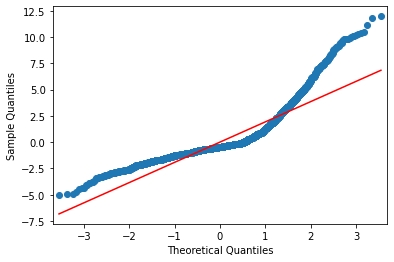

In [27]:
fig = sm.qqplot(res.resid, line="s")
plt.show()

#is the normality assumption met?
#no

f)	To further verify the normality assumption, create a histogram for the residuals. Does the histogram look like a normal distribution? 

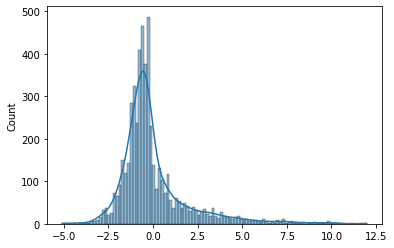

In [29]:
sns.histplot(res.resid, kde=True)
plt.show()

#no, this is not a normal distribution

g)	Test the linearity assumption by creating separate scatter plots for each input variable versus output variable. According to your plots, are the linearity assumptions met? 

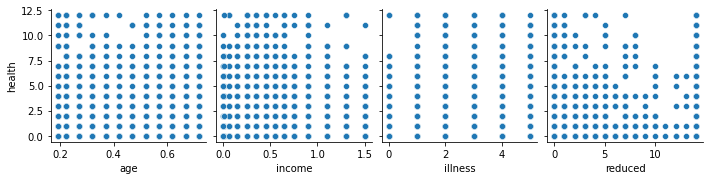

In [30]:
pp = sns.pairplot(data=data,
                  y_vars=['health'],
                  x_vars=['age', 'income', 'illness', 'reduced'])

#according to your plots, are the linearity assumptions met? 
#no

h)	Extract the predicted output values from the model, then create a scatter plot of the predicted output versus actual output (from the data provided). This plot is also used to evaluate the accuracy of the model. According to the plot, is your model good for predicting health scores? Use the res.predict() method to extract the predicted values. 

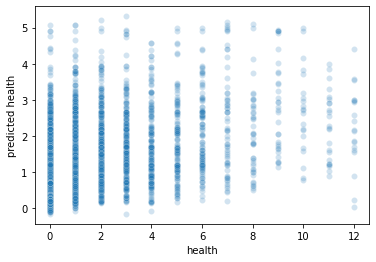

In [31]:
sns.scatterplot(x=data["health"], y=res.predict(), alpha=0.2)
plt.ylabel("predicted health")
plt.show()


#is your model good for predicting health scores?  
#no

i)	Check for multi-collinearity by generating a covariance matrix for the input data . You can use the .cov() method of pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html). Do you think there is multicollinearity among the input variables? 

In [32]:
X.cov()

#based on these values, there is not evidence of multicollinearity

,age,income,illness,reduced
age,1.000193,-0.271126,0.205023,0.094763
income,-0.271126,1.000193,-0.148840,-0.047554
illness,0.205023,-0.148840,1.000193,0.218158
reduced,0.094763,-0.047554,0.218158,1.000193


#### Question 3

Find your own dataset from an online source with at least 3 input variables. Here is a suggested source of data but you don’t have to use it: https://vincentarelbundock.github.io/Rdatasets/articles/data.html.  There should be one output variable of interest in the data. All the data used for analysis should be continuous. Clean the data as you find necessary, standardize the data and split it into training and test data using an appropriate split ratio. 

a)	Construct a linear regression model using ordinary least squares method by applying the .LinearRegression() constructor in sklearn and find the training and test accuracy of this model using mean square error (mse). https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

In [33]:
concrete = pd.read_csv("concrete.csv")
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [34]:
ssf = StandardScaler()
scaledconcrete = pd.DataFrame(ssf.fit_transform(concrete.drop(columns="csMPa")), columns=concrete.drop(columns="csMPa").columns)
X_train, X_test, y_train, y_test = train_test_split(scaledconcrete, concrete["csMPa"], test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(mean_squared_error(y_train, linreg.predict(X_train)))
print(mean_squared_error(y_test, linreg.predict(X_test)))

107.23993872814277
109.75080797014391


b)	Check for overfitting. Is there overfitting? Support your answer with some results you generated. 

In [36]:
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

#based on the accuracy scores for the training and test sets, there is not evidence of overfitting

0.6196723710532999
0.5943782479239209


c)	Fit a lasso regression on the data and check the training and test accuracy of the model using mse. Use the default alpha or penalty constant. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42, selection="random")
lasso.fit(X_train, y_train)
print(mean_squared_error(y_train, lasso.predict(X_train)), mean_squared_error(y_test, lasso.predict(X_test)))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


119.32593370594321 124.97100279368523
0.5768092561738591
0.5381267978849968


d)	Fit a ridge regression on the data and check the training and test accuracy of the model. Use the default alpha or penalty constant. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html 

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_train, ridge.predict(X_train)), mean_squared_error(y_test, ridge.predict(X_test)))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

107.25185314463663 109.56975176499003
0.6196301164434117
0.5950474032268936


e)	Which model is better, OLS, Lasso, or Ridge regression? 

In [39]:
#OLS and ridge regression accuracy scores on the training and test sets are nearly identical- the OLS scores are marginally better.

f)	Tune the alpha hyperparameters of the lasso and ridge regression using any tuning technique of your choice? What is the best alpha value for the lasso regression and what is the best alpha value for the ridge regression?

Note: There is no mini project for this assignment but your last assignment after this will have two mini projects (on logistic regression and clustering). 

In [40]:
from sklearn.model_selection import GridSearchCV

lassotuner = GridSearchCV(Lasso(random_state=42, selection="random"), param_grid={"alpha": np.arange(1, 101)/100}, cv=8, n_jobs=-1)
lassotuner.fit(X_train, y_train)
print(lassotuner.best_params_, lassotuner.best_estimator_.score(X_train, y_train), lassotuner.best_estimator_.score(X_test, y_test))
ridgetuner = GridSearchCV(Ridge(random_state=42), param_grid={"alpha": np.arange(101)/100}, cv=8, n_jobs=-1)
ridgetuner.fit(X_train, y_train)
print(ridgetuner.best_params_, ridgetuner.best_estimator_.score(X_train, y_train), ridgetuner.best_estimator_.score(X_test, y_test))

{'alpha': 0.01} 0.6196344577532135 0.5950893888524744
{'alpha': 1.0} 0.6196301164434117 0.5950474032268936
